In [1]:
!pip install git+https://github.com/amazon-science/chronos-forecasting.git

  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-req-build-kntt20ql
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-req-build-kntt20ql
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit 73d6c9aa1aba42612d99f13fc9365ff7f39c4335
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from chronos import ChronosPipeline
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import torch
import requests

### Companies

In [2]:
# Wikipedia page listing S&P 500 companies
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

tables = pd.read_html(url)
sp500_table = tables[0]

# Filter for the Information Technology sector
it_sector = sp500_table[sp500_table["GICS Sector"] == "Information Technology"]

it_companies = it_sector[["Symbol", "Security"]].reset_index(drop=True)
it_companies

,Symbol,Security
0,ACN,Accenture
1,ADBE,Adobe Inc.
2,AMD,Advanced Micro Devices
3,AKAM,Akamai Technologies
4,APH,Amphenol
...,...,...
64,TYL,Tyler Technologies
65,VRSN,Verisign
66,WDC,Western Digital
67,WDAY,"Workday, Inc."


### Historical Stock Prices

In [3]:
tickers = it_companies["Symbol"].tolist()

start_date = "2022-01-01"
end_date = "2024-12-31"

# Dictionary to store closing prices
close_prices = {}

for ticker in tickers:
    print(f"Fetching data for {ticker}...")
    try:
        data = yf.download(ticker, start=start_date, end=end_date)[["Close"]]
        close_prices[ticker] = data["Close"]
    except Exception as e:
        print(f"Failed to fetch {ticker}: {e}")

# Combine all stocks into a single DataFrame
combined_close_prices = pd.concat(close_prices, axis=1)
combined_close_prices.columns = combined_close_prices.columns.droplevel(0)
combined_close_prices.dropna(inplace=True)  # Remove missing values
combined_close_prices.head()

Fetching data for ACN...


[*********************100%***********************]  1 of 1 completed


Fetching data for ADBE...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for AMD...
Fetching data for AKAM...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for APH...



[*********************100%***********************]  1 of 1 completed


Fetching data for ADI...


[*********************100%***********************]  1 of 1 completed


Fetching data for ANSS...
Fetching data for AAPL...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for AMAT...
Fetching data for ANET...


[*********************100%***********************]  1 of 1 completed


Fetching data for ADSK...


[*********************100%***********************]  1 of 1 completed


Fetching data for AVGO...


[*********************100%***********************]  1 of 1 completed


Fetching data for CDNS...


[*********************100%***********************]  1 of 1 completed


Fetching data for CDW...


[*********************100%***********************]  1 of 1 completed


Fetching data for CSCO...


[*********************100%***********************]  1 of 1 completed


Fetching data for CTSH...


[*********************100%***********************]  1 of 1 completed


Fetching data for GLW...


[*********************100%***********************]  1 of 1 completed


Fetching data for CRWD...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for DELL...
Fetching data for ENPH...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for EPAM...
Fetching data for FFIV...


[*********************100%***********************]  1 of 1 completed


Fetching data for FICO...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for FSLR...
Fetching data for FTNT...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for IT...
Fetching data for GEN...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for GDDY...
Fetching data for HPE...


[*********************100%***********************]  1 of 1 completed


Fetching data for HPQ...


[*********************100%***********************]  1 of 1 completed


Fetching data for IBM...


[*********************100%***********************]  1 of 1 completed


Fetching data for INTC...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for INTU...
Fetching data for JBL...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for JNPR...
Fetching data for KEYS...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for KLAC...
Fetching data for LRCX...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for MCHP...
Fetching data for MU...


[*********************100%***********************]  1 of 1 completed


Fetching data for MSFT...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for MPWR...
Fetching data for MSI...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for NTAP...
Fetching data for NVDA...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for NXPI...
Fetching data for ON...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for ORCL...


[*********************100%***********************]  1 of 1 completed


Fetching data for PLTR...
Fetching data for PANW...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for PTC...
Fetching data for QCOM...


[*********************100%***********************]  1 of 1 completed


Fetching data for ROP...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for CRM...
Fetching data for STX...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for NOW...
Fetching data for SWKS...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for SMCI...
Fetching data for SNPS...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for TEL...
Fetching data for TDY...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for TER...
Fetching data for TXN...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for TRMB...
Fetching data for TYL...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for VRSN...
Fetching data for WDC...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for WDAY...
Fetching data for ZBRA...


[*********************100%***********************]  1 of 1 completed


Ticker,ACN,ADBE,AMD,AKAM,APH,ADI,ANSS,AAPL,AMAT,ANET,...,TEL,TDY,TER,TXN,TRMB,TYL,VRSN,WDC,WDAY,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,389.190216,564.369995,150.240005,117.510002,41.985886,167.763382,395.489990,179.076599,155.788940,35.560001,...,153.546524,442.170013,163.984985,173.458069,86.680000,523.849976,252.110001,65.930000,263.720001,583.900024
2022-01-04,386.409027,554.000000,144.419998,116.949997,42.116940,166.248184,391.100006,176.803802,154.259613,34.665001,...,156.531647,448.079987,164.251587,173.640076,85.110001,520.479980,250.429993,67.620003,253.059998,587.599976
2022-01-05,379.604126,514.429993,136.149994,115.480003,41.316055,163.681747,376.940002,172.100861,149.759232,33.287498,...,153.260406,428.920013,158.199982,170.018005,81.610001,492.589996,243.509995,67.059998,248.259995,558.179993
2022-01-06,361.272858,514.119995,136.229996,111.879997,41.350033,164.202621,368.880005,169.227951,152.291916,33.167500,...,154.080597,426.880005,161.388657,169.963425,82.029999,493.600006,241.820007,64.739998,250.630005,555.159973
2022-01-07,354.343628,510.700012,132.000000,110.540001,39.859894,159.893677,362.079987,169.395157,146.905106,32.369999,...,151.229065,422.010010,156.245285,163.301773,79.139999,483.589996,237.710007,65.830002,250.240005,530.859985


In [4]:
combined_close_prices

Ticker,ACN,ADBE,AMD,AKAM,APH,ADI,ANSS,AAPL,AMAT,ANET,...,TEL,TDY,TER,TXN,TRMB,TYL,VRSN,WDC,WDAY,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,389.190216,564.369995,150.240005,117.510002,41.985886,167.763382,395.489990,179.076599,155.788940,35.560001,...,153.546524,442.170013,163.984985,173.458069,86.680000,523.849976,252.110001,65.930000,263.720001,583.900024
2022-01-04,386.409027,554.000000,144.419998,116.949997,42.116940,166.248184,391.100006,176.803802,154.259613,34.665001,...,156.531647,448.079987,164.251587,173.640076,85.110001,520.479980,250.429993,67.620003,253.059998,587.599976
2022-01-05,379.604126,514.429993,136.149994,115.480003,41.316055,163.681747,376.940002,172.100861,149.759232,33.287498,...,153.260406,428.920013,158.199982,170.018005,81.610001,492.589996,243.509995,67.059998,248.259995,558.179993
2022-01-06,361.272858,514.119995,136.229996,111.879997,41.350033,164.202621,368.880005,169.227951,152.291916,33.167500,...,154.080597,426.880005,161.388657,169.963425,82.029999,493.600006,241.820007,64.739998,250.630005,555.159973
2022-01-07,354.343628,510.700012,132.000000,110.540001,39.859894,159.893677,362.079987,169.395157,146.905106,32.369999,...,151.229065,422.010010,156.245285,163.301773,79.139999,483.589996,237.710007,65.830002,250.240005,530.859985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,358.769989,446.739990,124.599998,96.599998,70.989998,214.889999,339.500000,255.270004,167.460007,113.089996,...,144.110001,470.100006,128.470001,188.744263,71.169998,594.400024,199.960007,61.560001,265.390015,390.649994
2024-12-24,361.630005,447.940002,126.290001,96.910004,71.660004,218.089996,342.839996,258.200012,168.369995,114.650002,...,145.500000,475.010010,129.960007,191.027374,71.870003,599.260010,201.479996,61.700001,269.040009,395.440002
2024-12-26,360.429993,450.160004,125.059998,97.959999,71.559998,218.059998,340.160004,259.019989,167.550003,114.860001,...,146.300003,476.570007,130.839996,190.322586,72.300003,592.840027,202.729996,61.709999,269.380005,396.850006


### Technical Indicators

In [6]:
# Define a function to calculate technical indicators
def calculate_technical_indicators(data, ticker):
    # Simple Moving Average (SMA)
    data['SMA_20'] = data['Close'].rolling(window=20).mean()

    # Exponential Moving Average (EMA)
    data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()

    # Relative Strength Index (RSI)
    def calculate_rsi(data, window=14):
        delta = data['Close'].diff(1)
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        return rsi

    data['RSI'] = calculate_rsi(data)

    # Bollinger Bands
    rolling_std = data['Close'].rolling(window=20).std()

    # Middle Band is the SMA
    data['BB_Middle'] = data['SMA_20']
    # Upper and Lower Bands
    #print(pd.Series(data['BB_Middle']) + 2 * rolling_std)
    data['BB_Upper'] = data['BB_Middle'] + 2 * rolling_std[ticker]
    data['BB_Lower'] = data['BB_Middle'] - 2 * rolling_std[ticker]

    return data

In [7]:
technical_indicators = {}

for ticker in tickers:
    print(f"Processing {ticker}...")

    # Fetch historical data
    data = yf.download(ticker, start=start_date, end=end_date)

    # Calculate technical indicators
    data_with_indicators = calculate_technical_indicators(data, ticker)

    # Store the processed DataFrame
    globals()[f"{ticker}"] = data_with_indicators
    technical_indicators[ticker] = data_with_indicators


# Combine all indicators into a single MultiIndex DataFrame
combined_indicators = pd.concat(technical_indicators, axis=1)
# Example output: display a single company's indicators
#print(technical_indicators['AAPL'].tail())  # Replace 'AAPL' with any ticker


[*********************100%***********************]  1 of 1 completed

Processing ACN...



[*********************100%***********************]  1 of 1 completed

Processing ADBE...



[*********************100%***********************]  1 of 1 completed

Processing AMD...



[*********************100%***********************]  1 of 1 completed


Processing AKAM...
Processing APH...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing ADI...



[*********************100%***********************]  1 of 1 completed

Processing ANSS...


Processing AAPL...


[*********************100%***********************]  1 of 1 completed


Processing AMAT...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing ANET...



[*********************100%***********************]  1 of 1 completed

Processing ADSK...


Processing AVGO...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing CDNS...
Processing CDW...


[*********************100%***********************]  1 of 1 completed

Processing CSCO...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing CTSH...


[*********************100%***********************]  1 of 1 completed

Processing GLW...



[*********************100%***********************]  1 of 1 completed


Processing CRWD...
Processing DELL...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing ENPH...
Processing EPAM...


[*********************100%***********************]  1 of 1 completed


Processing FFIV...
Processing FICO...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing FSLR...
Processing FTNT...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing IT...
Processing GEN...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing GDDY...



[*********************100%***********************]  1 of 1 completed

Processing HPE...


Processing HPQ...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing IBM...
Processing INTC...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing INTU...
Processing JBL...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing JNPR...



[*********************100%***********************]  1 of 1 completed


Processing KEYS...
Processing KLAC...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing LRCX...
Processing MCHP...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing MU...



[*********************100%***********************]  1 of 1 completed

Processing MSFT...
Processing MPWR...



[*********************100%***********************]  1 of 1 completed


Processing MSI...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing NTAP...
Processing NVDA...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing NXPI...
Processing ON...


[*********************100%***********************]  1 of 1 completed


Processing ORCL...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing PLTR...
Processing PANW...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing PTC...
Processing QCOM...


[*********************100%***********************]  1 of 1 completed


Processing ROP...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing CRM...
Processing STX...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing NOW...



[*********************100%***********************]  1 of 1 completed


Processing SWKS...
Processing SMCI...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing SNPS...
Processing TEL...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Processing TDY...



[*********************100%***********************]  1 of 1 completed


Processing TER...
Processing TXN...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing TRMB...
Processing TYL...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing VRSN...
Processing WDC...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Processing WDAY...
Processing ZBRA...


[*********************100%***********************]  1 of 1 completed


In [8]:
ACN

Price,Close,High,Low,Open,Volume,SMA_20,EMA_20,RSI,BB_Middle,BB_Upper,BB_Lower
Ticker,ACN,ACN,ACN,ACN,ACN,,,,,,
Date,,,,,,,,,,,
2022-01-03,389.190247,397.142079,387.116289,396.310583,2129900,NaN,389.190247,NaN,NaN,NaN,NaN
2022-01-04,386.408997,393.166144,385.357697,390.719430,2516300,NaN,388.925366,NaN,NaN,NaN,NaN
2022-01-05,379.604095,386.093634,379.527648,386.055396,2471400,NaN,388.037626,NaN,NaN,NaN,NaN
2022-01-06,361.272858,374.844495,359.131991,367.666816,4386600,NaN,385.488600,NaN,NaN,NaN,NaN
2022-01-07,354.343658,363.174763,353.760666,362.314595,3469000,NaN,382.522415,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,358.769989,362.959991,355.730011,360.579987,3549300,360.407498,360.081471,54.090597,360.407498,370.372316,350.442681
2024-12-24,361.630005,361.950012,358.540009,359.950012,1075400,360.424498,360.228951,51.118572,360.424498,370.396812,350.452184


In [9]:
ZBRA.columns

MultiIndex([(    'Close', 'ZBRA'),
            (     'High', 'ZBRA'),
            (      'Low', 'ZBRA'),
            (     'Open', 'ZBRA'),
            (   'Volume', 'ZBRA'),
            (   'SMA_20',     ''),
            (   'EMA_20',     ''),
            (      'RSI',     ''),
            ('BB_Middle',     ''),
            ( 'BB_Upper',     ''),
            ( 'BB_Lower',     '')],
           names=['Price', 'Ticker'])

## Visualization

In [ ]:
data = ZBRA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example preprocessing
data.index = pd.to_datetime(data.index)  # Set the index to datetime for time-series analysis

# Step 1: Access data for specific tickers
ticker = 'ZBRA'  # Example ticker
price_data = data.xs(ticker, axis=1, level='Ticker')
indicators_data = data.loc[:, data.columns.get_level_values('Ticker') == '']

# Step 2: Plot Close, High, Low, Open prices
plt.figure(figsize=(12, 6))
plt.plot(price_data.index, price_data['Close'], label='Close', color='blue')
plt.plot(price_data.index, price_data['High'], label='High', color='green', alpha=0.6)
plt.plot(price_data.index, price_data['Low'], label='Low', color='red', alpha=0.6)
plt.title(f'Daily Price Trends for {ticker}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Step 3: Volume vs Close Price Overlay
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(price_data.index, price_data['Volume'], color='gray', alpha=0.3, label='Volume')
ax2 = ax1.twinx()
ax2.plot(price_data.index, price_data['Close'], color='blue', label='Close')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='gray')
ax2.set_ylabel('Close Price', color='blue')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title(f'Volume vs Close Price for {ticker}')
plt.show()

# Step 4: Plot Technical Indicators
plt.figure(figsize=(12, 6))
plt.plot(price_data.index, price_data['Close'], label='Close', color='blue')
plt.plot(price_data.index, indicators_data['SMA_20'], label='SMA_20', color='orange')
plt.plot(price_data.index, indicators_data['EMA_20'], label='EMA_20', color='green')
plt.fill_between(price_data.index, indicators_data['BB_Upper'], indicators_data['BB_Lower'],
                 color='gray', alpha=0.2, label='Bollinger Bands')
plt.title(f'Close Price with Technical Indicators for {ticker}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Step 5: RSI Visualization
plt.figure(figsize=(12, 6))
plt.plot(price_data.index, indicators_data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title(f'Relative Strength Index (RSI) for {ticker}')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

## Chronos-Bolt

In [11]:
it_companies.head()

,Symbol,Security
0,ACN,Accenture
1,ADBE,Adobe Inc.
2,AMD,Advanced Micro Devices
3,AKAM,Akamai Technologies
4,APH,Amphenol


In [12]:
combined_close_prices.head()

Ticker,ACN,ADBE,AMD,AKAM,APH,ADI,ANSS,AAPL,AMAT,ANET,...,TEL,TDY,TER,TXN,TRMB,TYL,VRSN,WDC,WDAY,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,389.190247,564.369995,150.240005,117.510002,41.985889,167.763397,395.489990,179.076569,155.788940,35.560001,...,153.546524,442.170013,163.985016,173.458069,86.680000,523.849976,252.110001,65.930000,263.720001,583.900024
2022-01-04,386.409027,554.000000,144.419998,116.949997,42.116936,166.248169,391.100006,176.803802,154.259583,34.665001,...,156.531647,448.079987,164.251556,173.640091,85.110001,520.479980,250.429993,67.620003,253.059998,587.599976
2022-01-05,379.604065,514.429993,136.149994,115.480003,41.316051,163.681763,376.940002,172.100861,149.759232,33.287498,...,153.260422,428.920013,158.199982,170.018036,81.610001,492.589996,243.509995,67.059998,248.259995,558.179993
2022-01-06,361.272919,514.119995,136.229996,111.879997,41.350025,164.202621,368.880005,169.227921,152.291885,33.167500,...,154.080612,426.880005,161.388626,169.963394,82.029999,493.600006,241.820007,64.739998,250.630005,555.159973
2022-01-07,354.343689,510.700012,132.000000,110.540001,39.859890,159.893692,362.079987,169.395187,146.905075,32.369999,...,151.229050,422.010010,156.245316,163.301743,79.139999,483.589996,237.710007,65.830002,250.240005,530.859985


In [1]:
!pip install git+https://github.com/amazon-science/chronos-forecasting.git autogluon pandas numpy torch matplotlib yfinance

  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-req-build-nj0rkarj
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-req-build-nj0rkarj
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit 73d6c9aa1aba42612d99f13fc9365ff7f39c4335
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.9 MB/s eta 0:00:00
  Preparing metadata 


Processing Apple (AAPL):


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/185M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

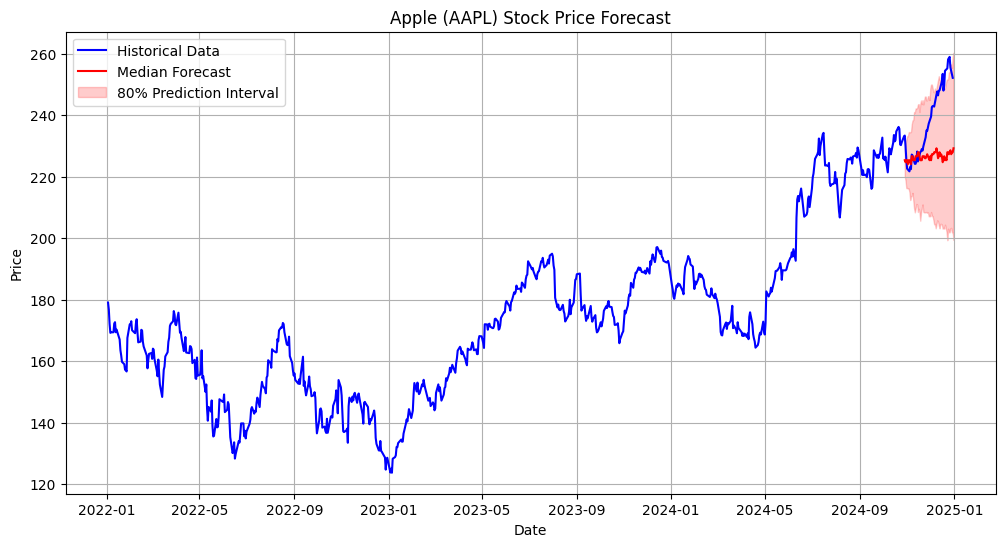

MASE: 6.0479, WQL: 4.6991


{'Company': 'Apple',
 'Ticker': 'AAPL',
 'MASE': 6.047860178966764,
 'WQL': 4.699056284507732}

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
from chronos import ChronosPipeline
import matplotlib.pyplot as plt
import torch

def get_stock_data(ticker, start_date, end_date):
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date)
    if df.empty:
        print(f"Warning: No data found for {ticker}. It may be delisted or unavailable.")
        return None
    df.index = df.index.tz_localize(None)  # Ensure timezone consistency
    return df['Close']

def calculate_mase(actual, predicted):
    if actual is None or predicted is None:
        return np.nan
    mae = np.mean(np.abs(actual - predicted))
    naive_mae = np.mean(np.abs(actual.values[1:] - actual.values[:-1]))
    return mae / naive_mae

def calculate_wql(actual, forecast_array):
    if actual is None or forecast_array is None:
        return np.nan
    quantiles = np.linspace(0.1, 0.9, 9)
    wql_scores = []
    forecast_array_trimmed = forecast_array[:, :len(actual)]
    for q in quantiles:
        quantile_forecast = np.percentile(forecast_array_trimmed, q * 100, axis=0)
        error = np.maximum(q * (actual - quantile_forecast), (q - 1) * (actual - quantile_forecast))
        wql_scores.append(np.mean(error))
    return np.mean(wql_scores)

def process_company(company_name, ticker):
    print(f"\nProcessing {company_name} ({ticker}):")
    start_date, end_date, forecast_start, forecast_end = "2022-01-01", "2024-10-02", "2024-10-29", "2024-12-31"

    all_stock = get_stock_data(ticker, start_date, forecast_end)
    stock = get_stock_data(ticker, start_date, end_date)

    if stock is None or all_stock is None:
        return {'Company': company_name, 'Ticker': ticker, 'MASE': np.nan, 'WQL': np.nan}

    stock_pipeline = ChronosPipeline.from_pretrained('amazon/chronos-t5-small', device_map="cpu", torch_dtype=torch.bfloat16)
    context = torch.tensor(stock.values).unsqueeze(0)
    stock_forecast = stock_pipeline.predict(context=context, prediction_length=64, num_samples=100)

    forecast_dates = pd.date_range(start=forecast_start, end=forecast_end)
    forecast_array = stock_forecast.numpy().squeeze()

    median_forecast = np.median(forecast_array, axis=0)
    lower_bound, upper_bound = np.percentile(forecast_array, 10, axis=0), np.percentile(forecast_array, 90, axis=0)

    stock_forecast_df = pd.DataFrame({'Median Forecast': median_forecast, 'Lower Bound': lower_bound, 'Upper Bound': upper_bound}, index=forecast_dates)

    plt.figure(figsize=(12, 6))
    plt.plot(all_stock.index, all_stock.values, label='Historical Data', color='blue')
    plt.plot(stock_forecast_df.index, stock_forecast_df['Median Forecast'], label='Median Forecast', color='red')
    plt.fill_between(stock_forecast_df.index, stock_forecast_df['Lower Bound'], stock_forecast_df['Upper Bound'], color='red', alpha=0.2, label='80% Prediction Interval')
    plt.title(f'{company_name} ({ticker}) Stock Price Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    actual_forecast = all_stock[forecast_start:forecast_end]
    mase, wql = calculate_mase(actual_forecast, stock_forecast_df['Median Forecast']), calculate_wql(actual_forecast.values, forecast_array)

    print(f"MASE: {mase:.4f}, WQL: {wql:.4f}")
    return {'Company': company_name, 'Ticker': ticker, 'MASE': mase, 'WQL': wql}

process_company("Apple", "AAPL")

### Streamline


Processing Accenture (ACN):


config.json:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/185M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

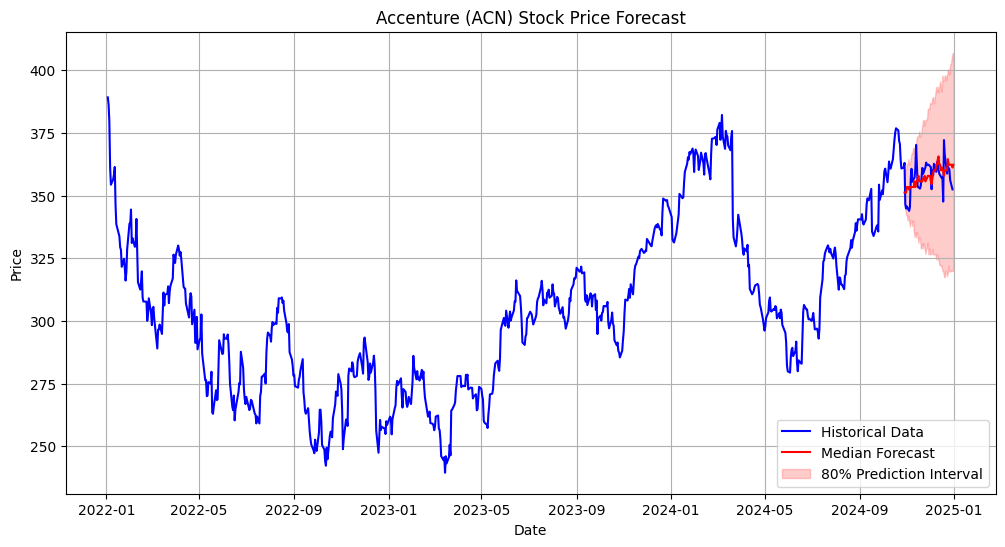

MASE: 1.1140, WQL: 2.8169

Processing Adobe Inc. (ADBE):


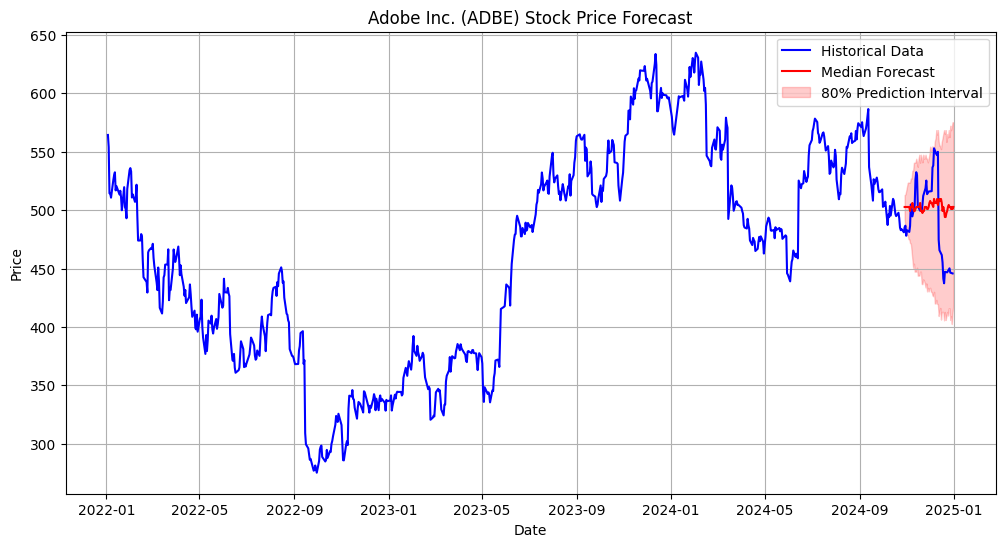

MASE: 3.3948, WQL: 10.2436

Processing Advanced Micro Devices (AMD):


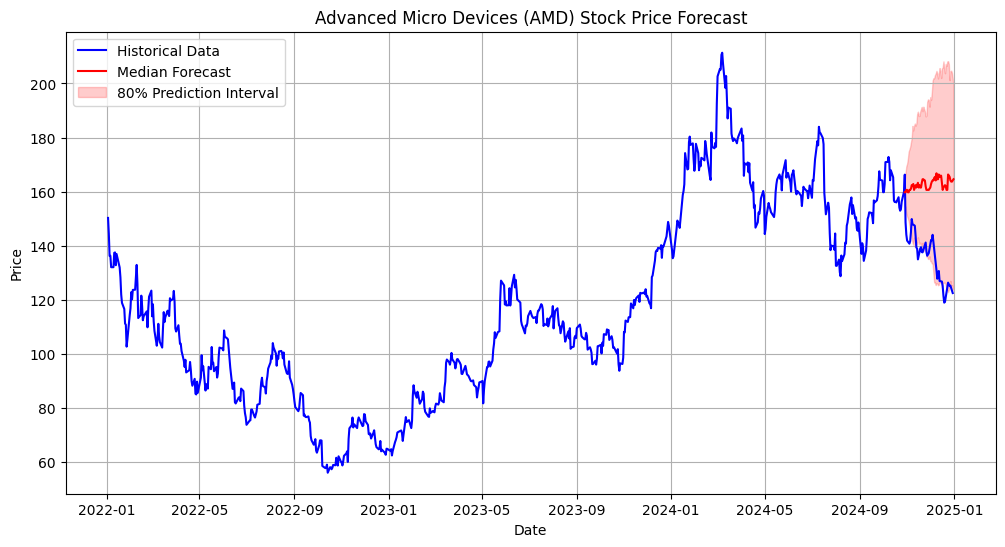

MASE: 9.7474, WQL: 9.5739

Processing Akamai Technologies (AKAM):


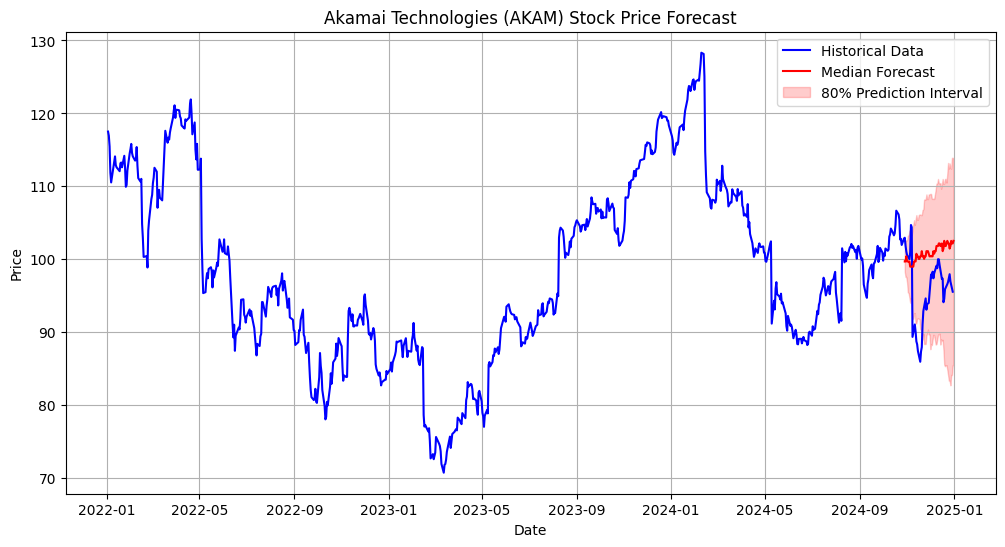

MASE: 3.9624, WQL: 2.0030

Processing Amphenol (APH):


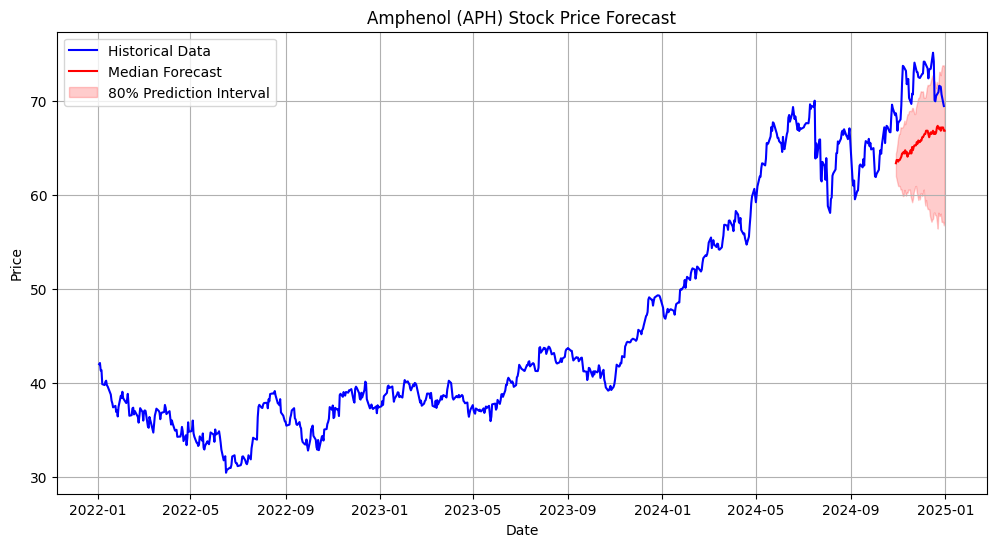

MASE: 7.4196, WQL: 2.8375

Processing Analog Devices (ADI):


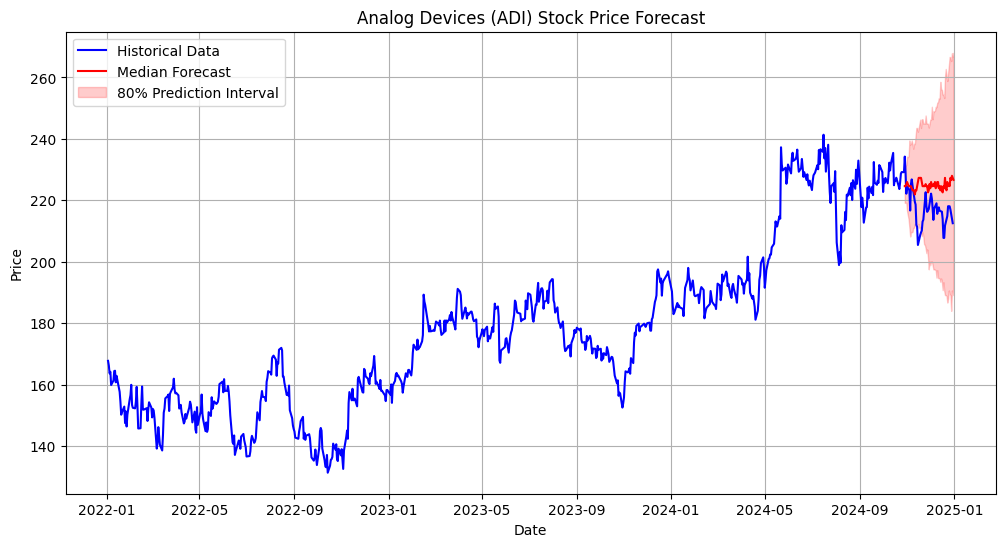

MASE: 2.8127, WQL: 3.1602

Processing Ansys (ANSS):


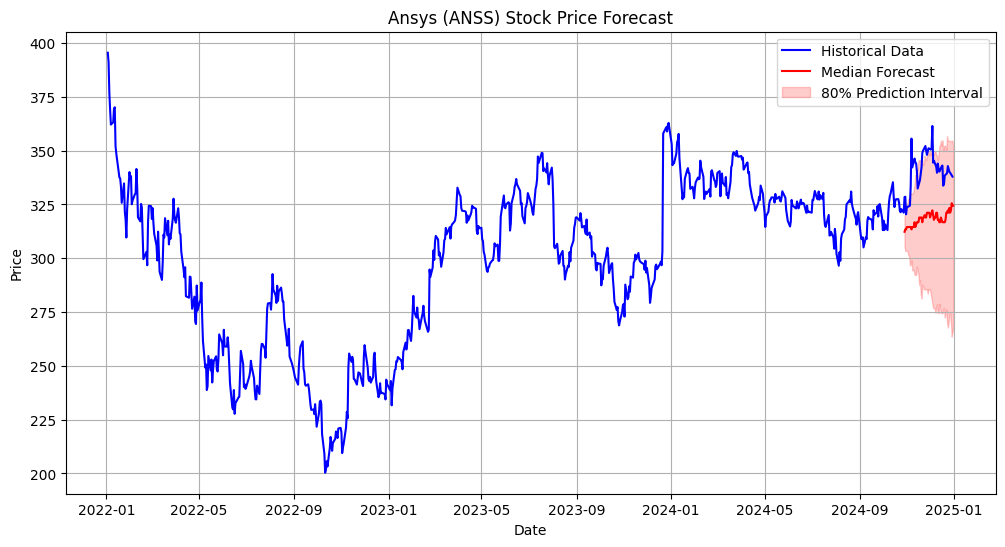

MASE: 5.6384, WQL: 8.7417

Processing Apple Inc. (AAPL):


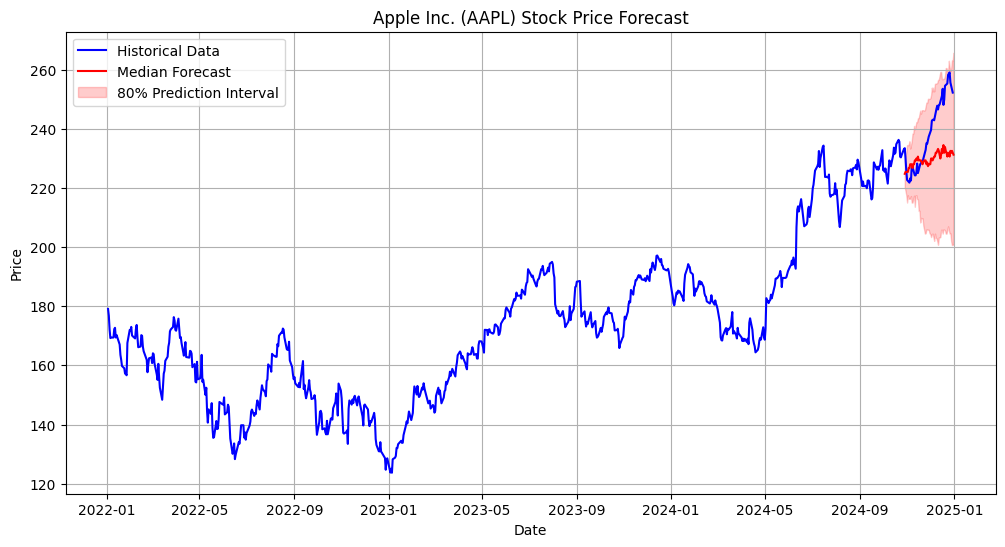

MASE: 5.0358, WQL: 4.0153

Processing Applied Materials (AMAT):


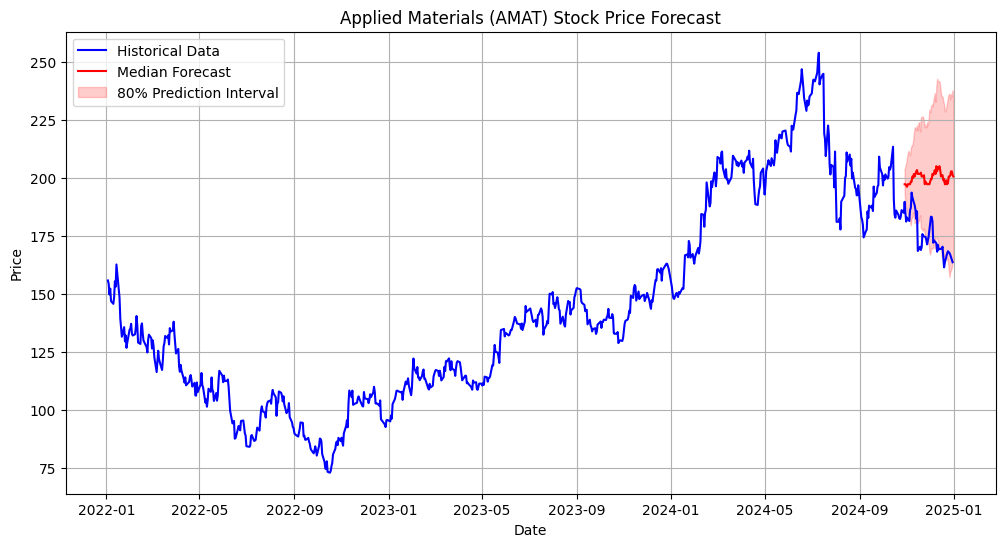

MASE: 8.1909, WQL: 9.1854

Processing Arista Networks (ANET):


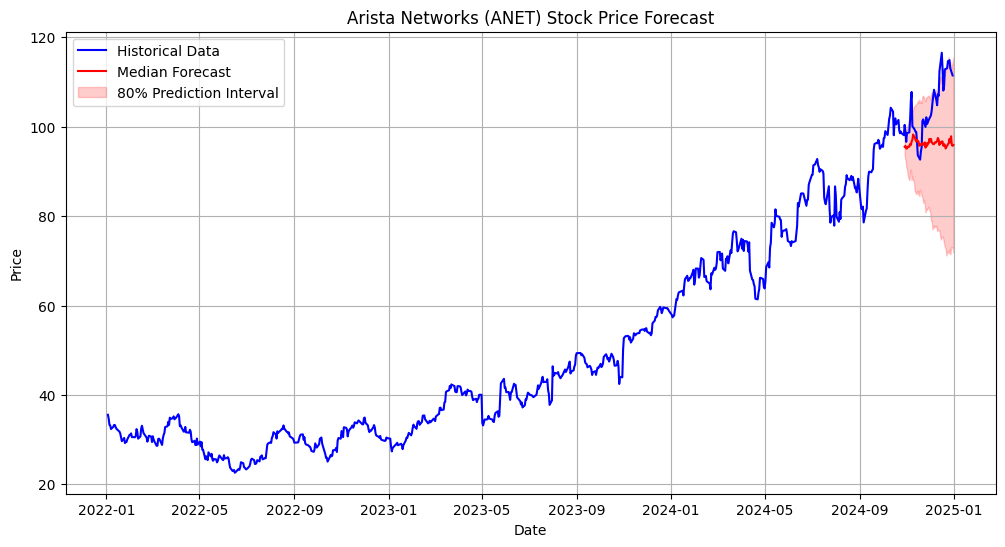

MASE: 3.9810, WQL: 3.3144

Processing Autodesk (ADSK):


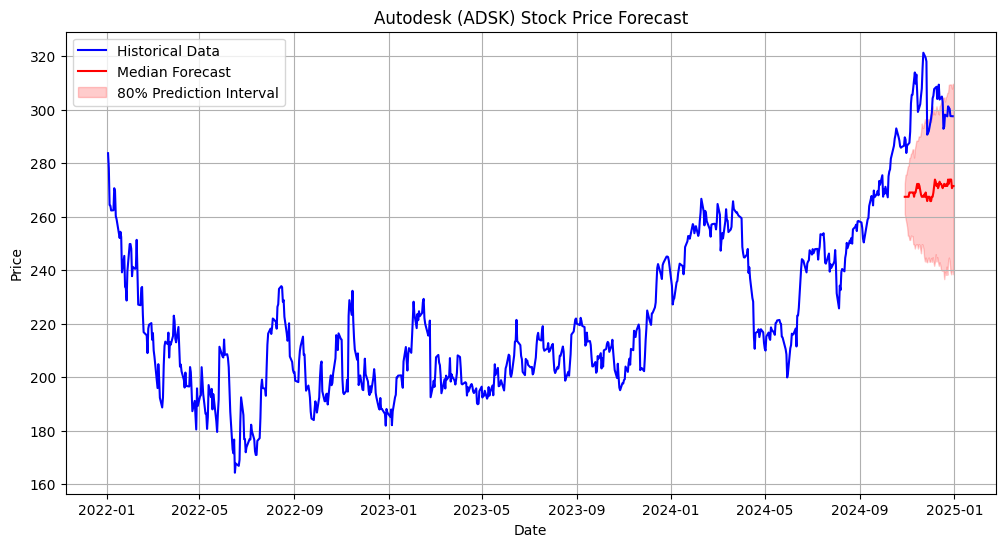

MASE: 7.9749, WQL: 13.2666

Processing Broadcom (AVGO):


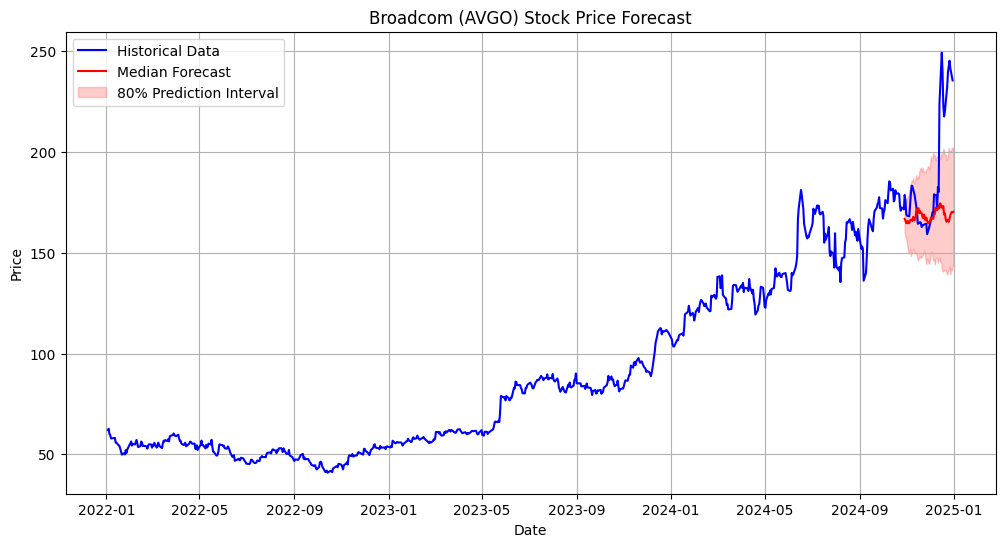

MASE: 3.7718, WQL: 9.3058

Processing Cadence Design Systems (CDNS):


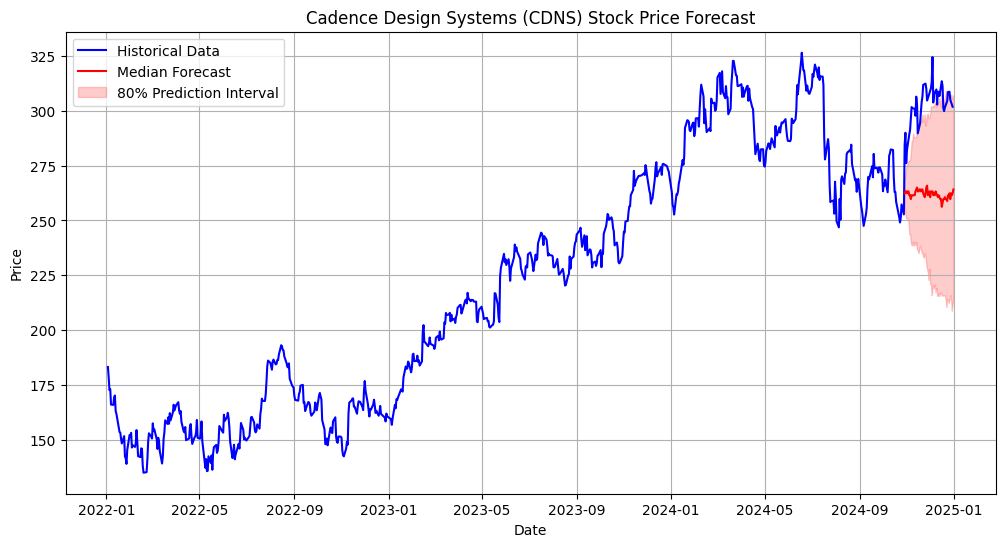

MASE: 8.4300, WQL: 15.3830

Processing CDW (CDW):


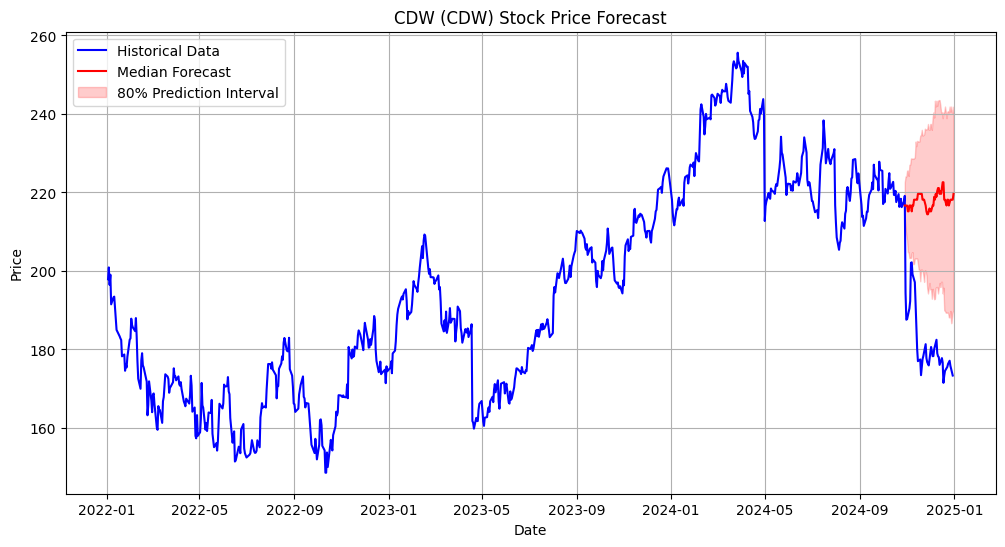

MASE: 12.0925, WQL: 14.9300

Processing Cisco (CSCO):


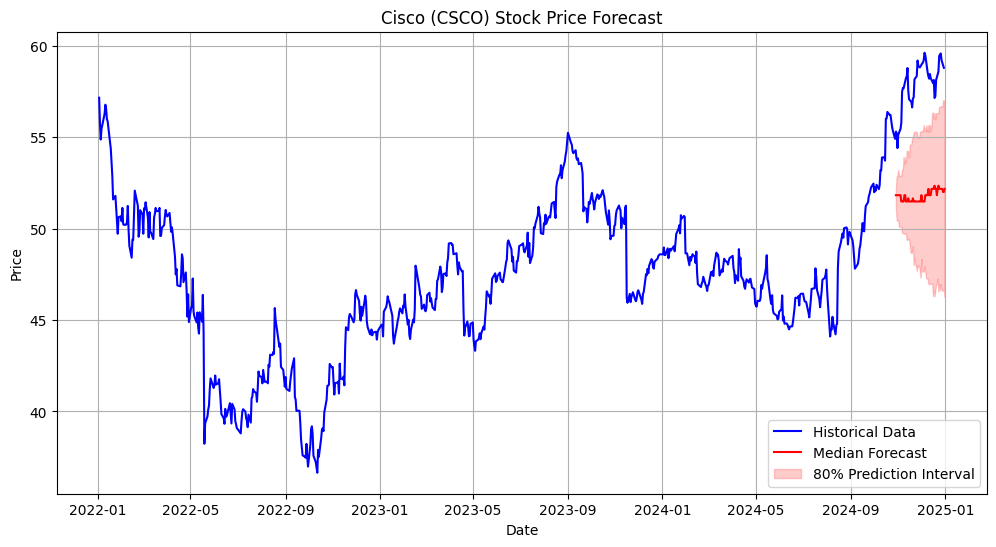

MASE: 14.4227, WQL: 2.6620

Processing Cognizant (CTSH):


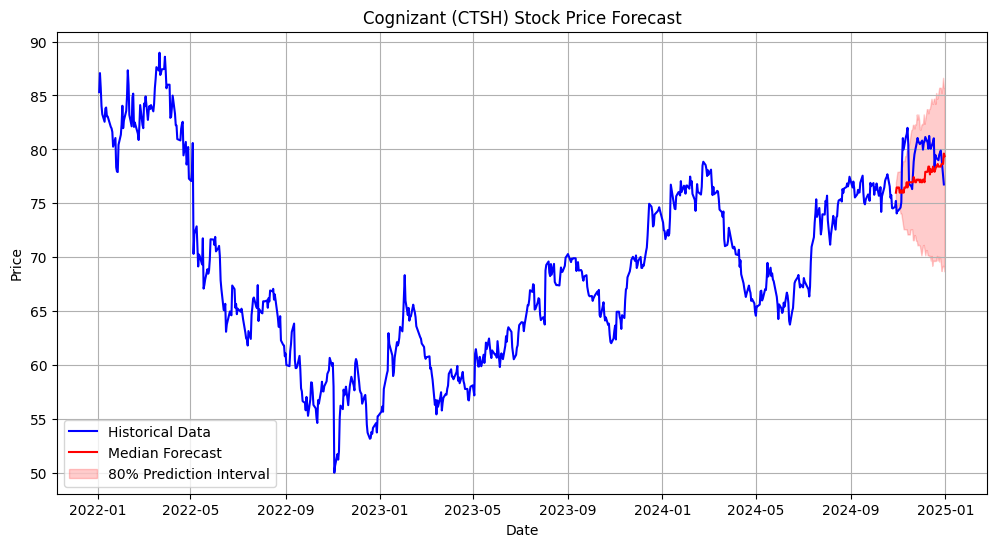

MASE: 2.6874, WQL: 1.0600

Processing Corning Inc. (GLW):


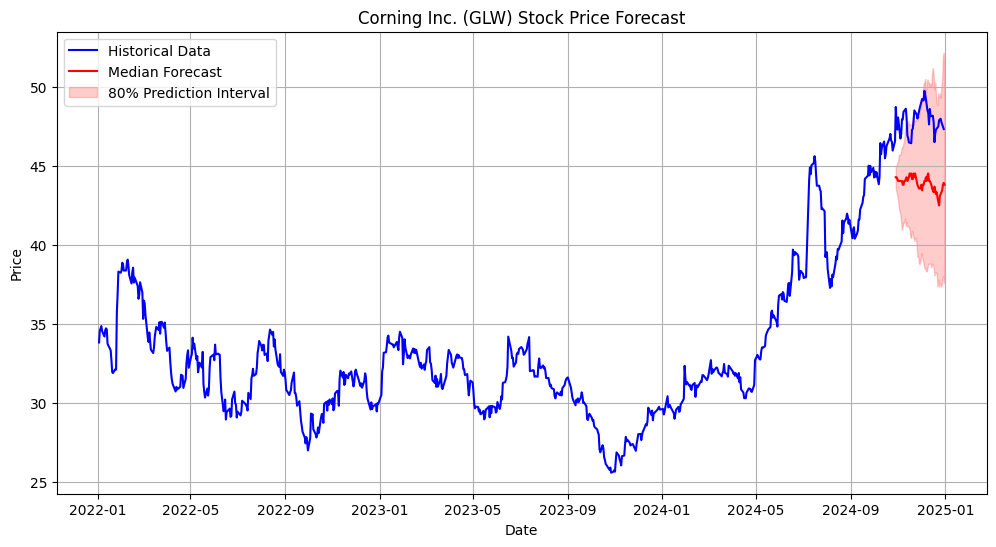

MASE: 8.6485, WQL: 1.4261

Processing CrowdStrike (CRWD):


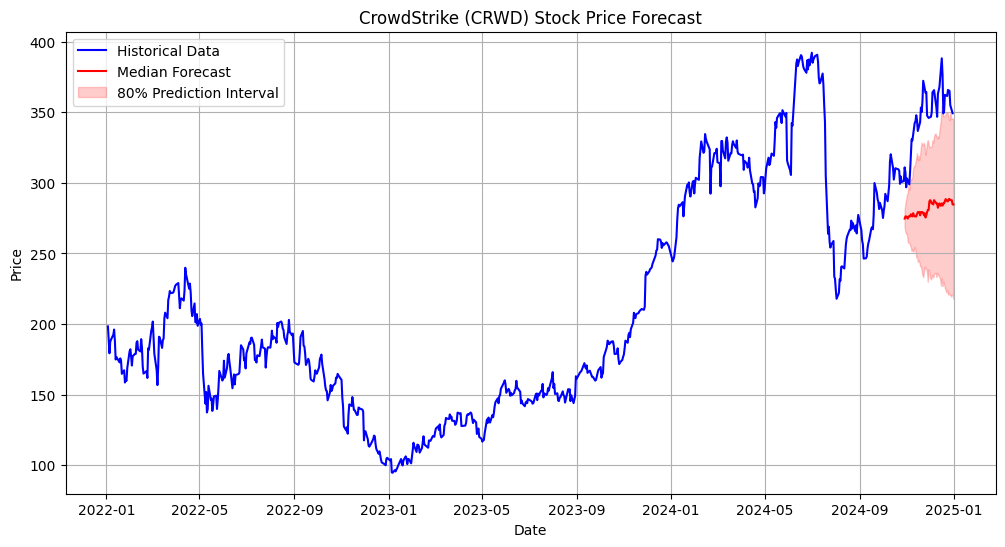

MASE: 8.9634, WQL: 28.2084

Processing Dell Technologies (DELL):


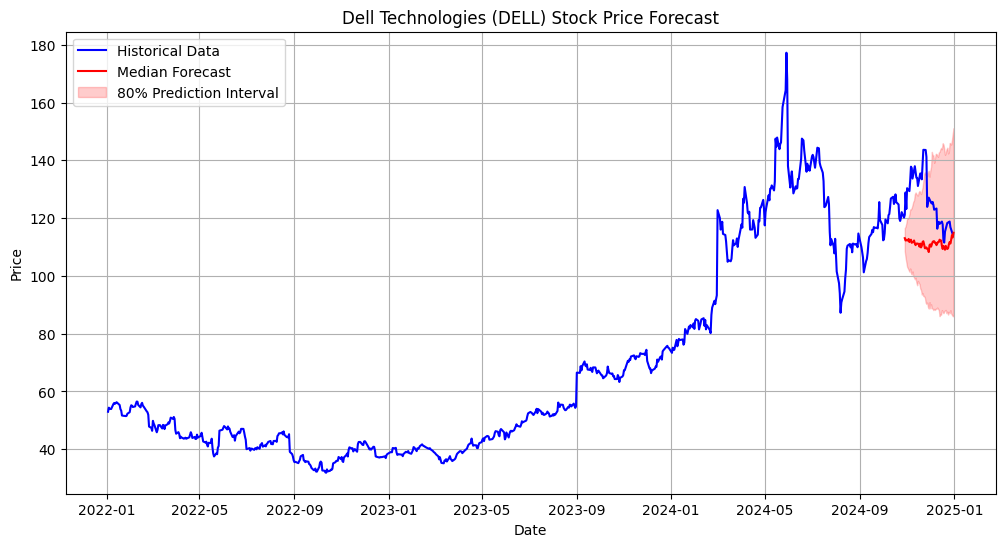

MASE: 5.4639, WQL: 6.2844

Processing Enphase Energy (ENPH):


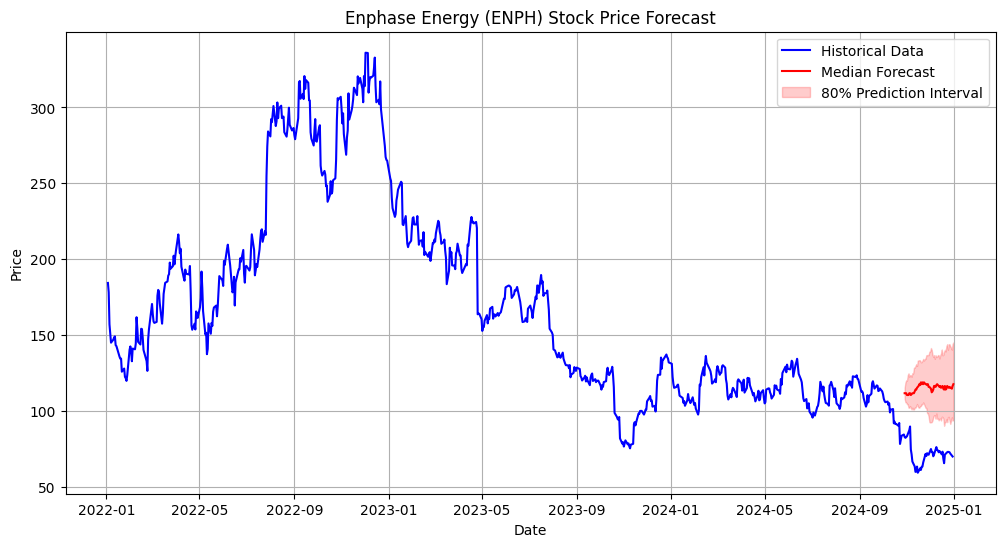

MASE: 17.3697, WQL: 19.4474

Processing EPAM Systems (EPAM):


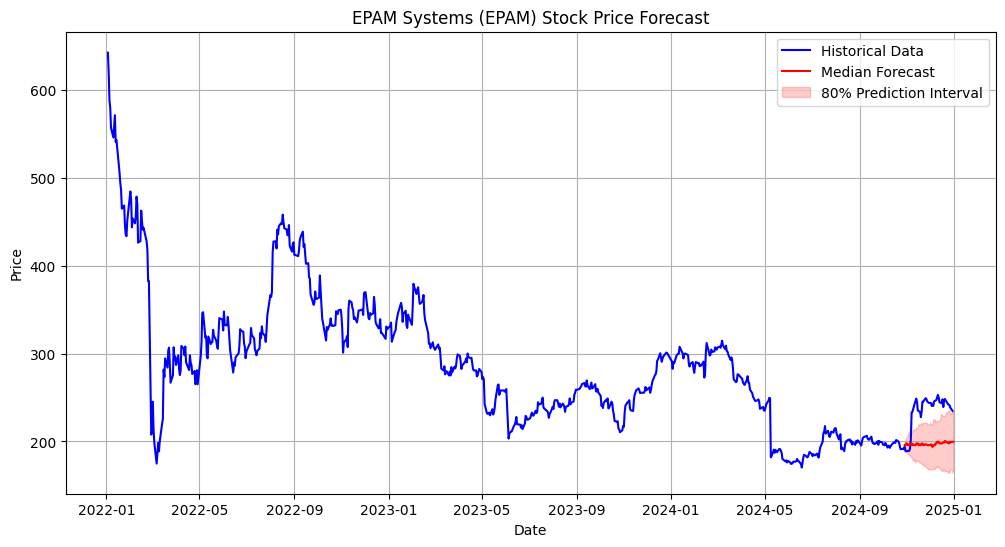

MASE: 9.2140, WQL: 17.0975

Processing F5, Inc. (FFIV):


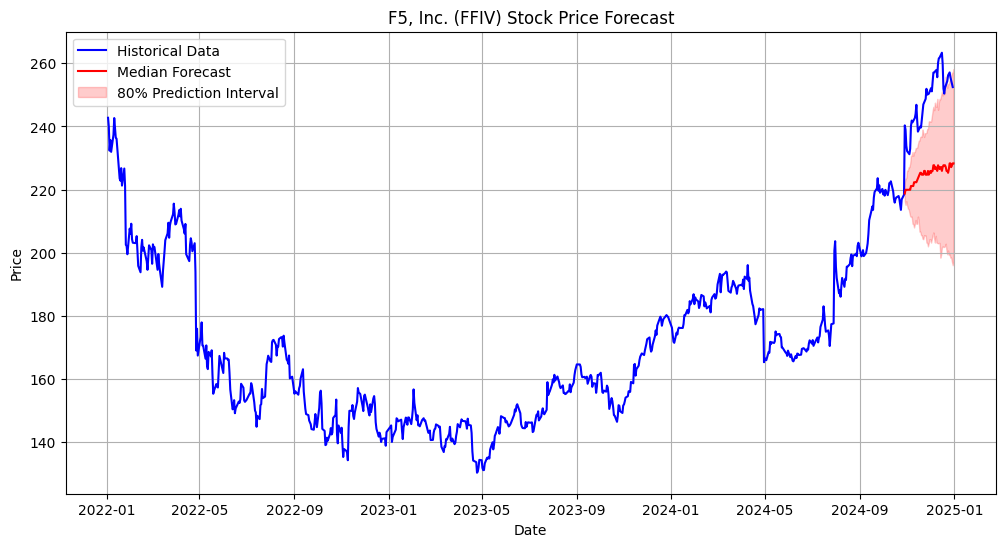

MASE: 10.5753, WQL: 10.5439

Processing Fair Isaac (FICO):


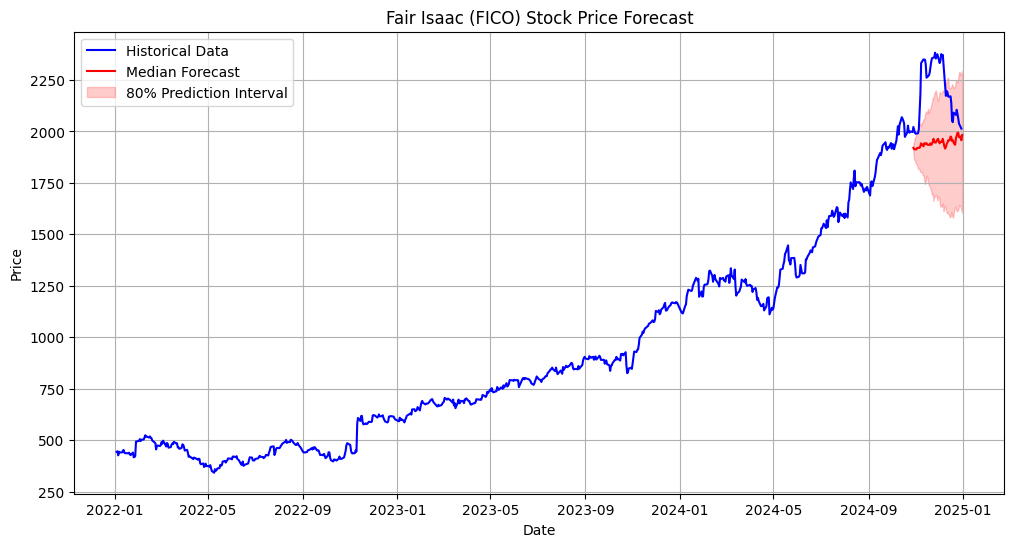

MASE: 8.4186, WQL: 113.5847

Processing First Solar (FSLR):


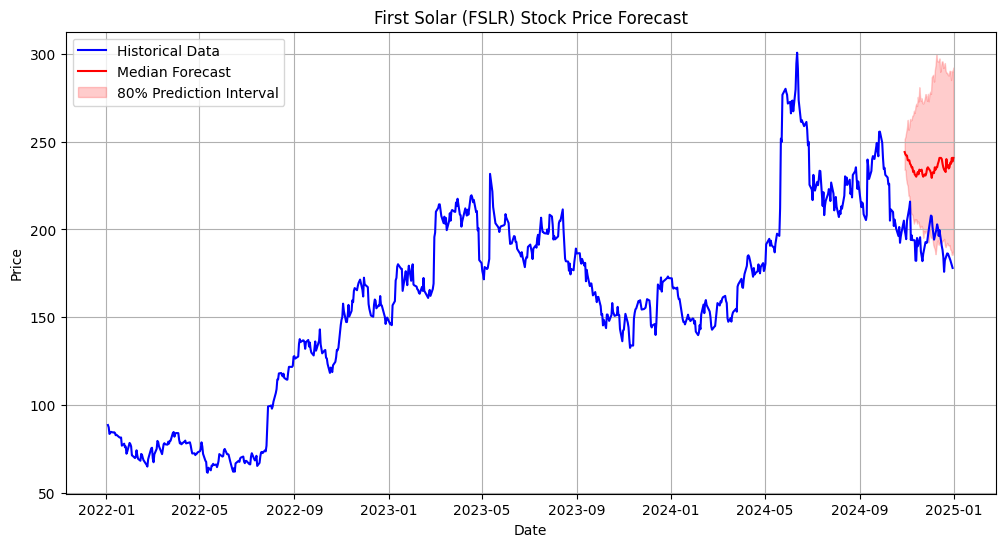

MASE: 8.6369, WQL: 16.2729

Processing Fortinet (FTNT):


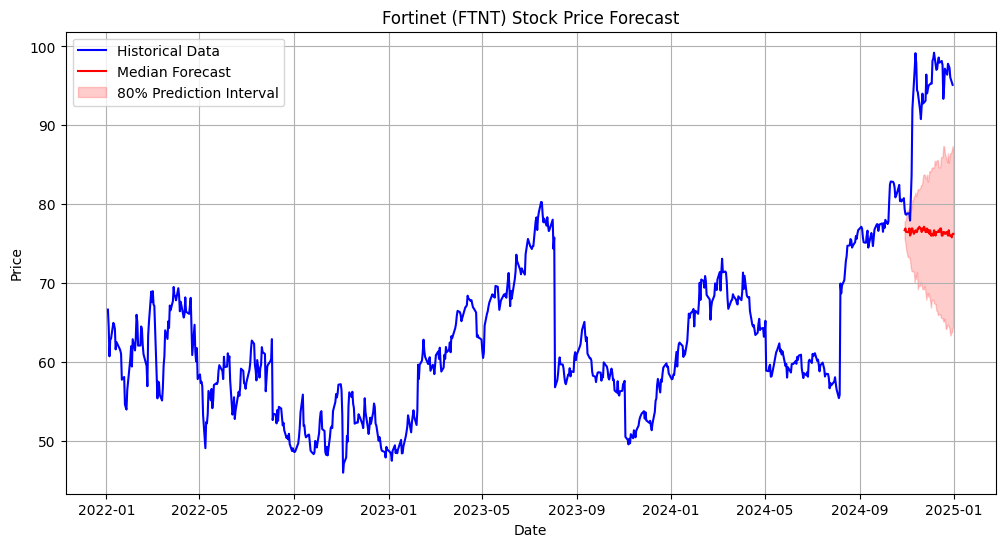

MASE: 10.5336, WQL: 7.3452

Processing Gartner (IT):


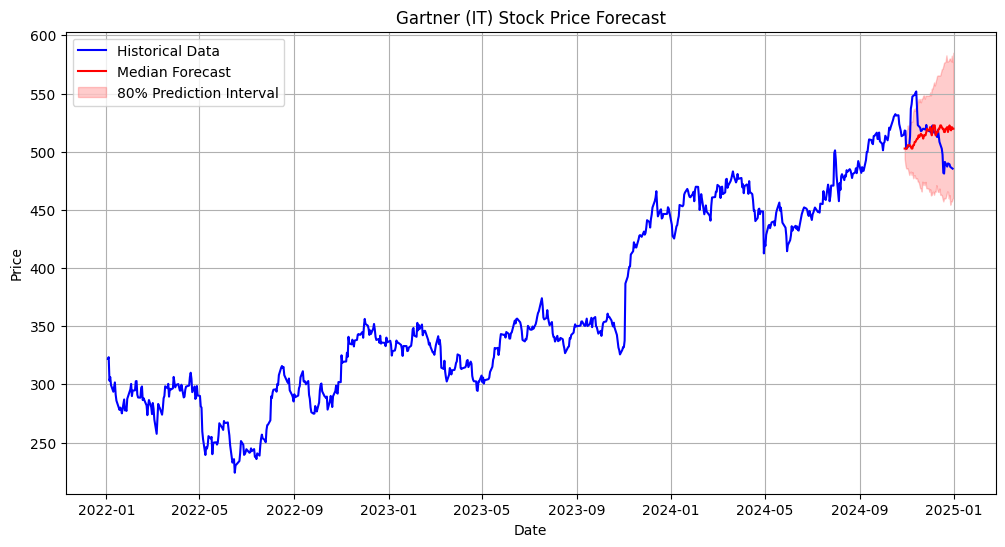

MASE: 3.5020, WQL: 7.3442

Processing Gen Digital (GEN):


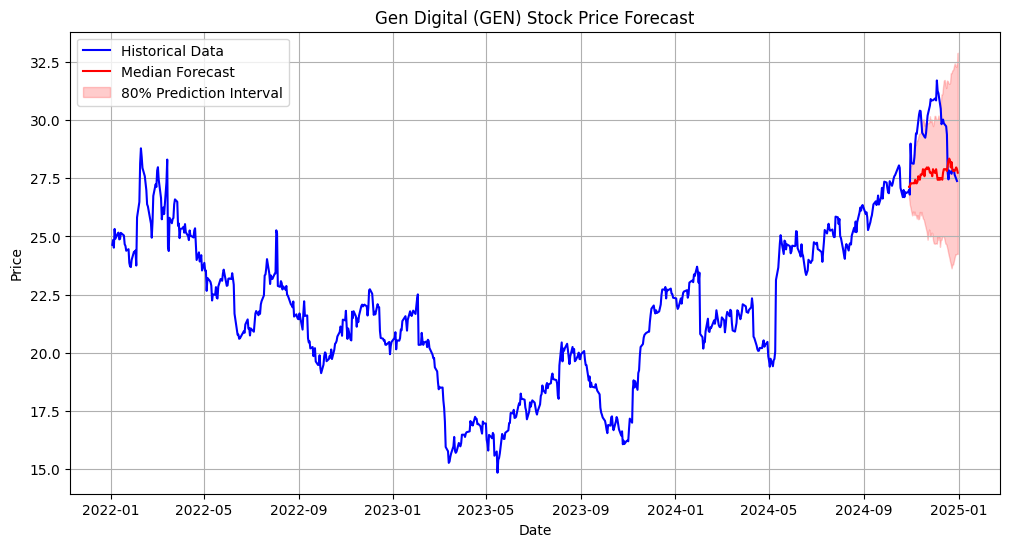

MASE: 5.1136, WQL: 0.7505

Processing GoDaddy (GDDY):


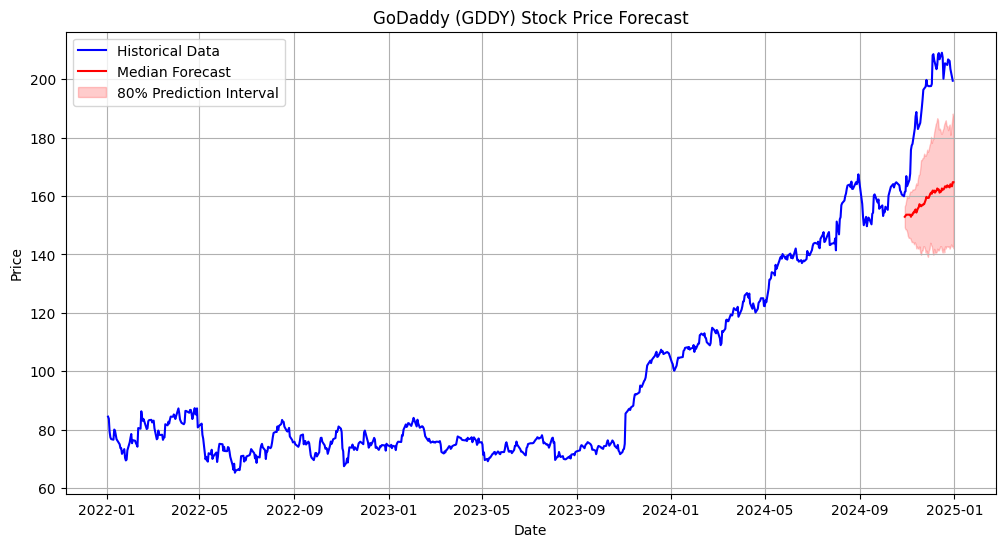

MASE: 13.0801, WQL: 15.8038

Processing Hewlett Packard Enterprise (HPE):


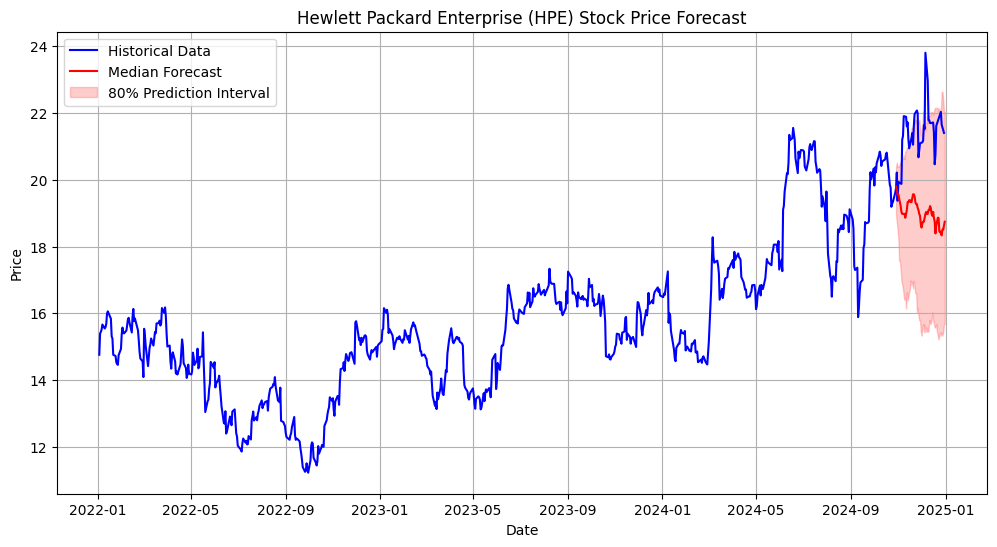

MASE: 5.5629, WQL: 0.8404

Processing HP Inc. (HPQ):


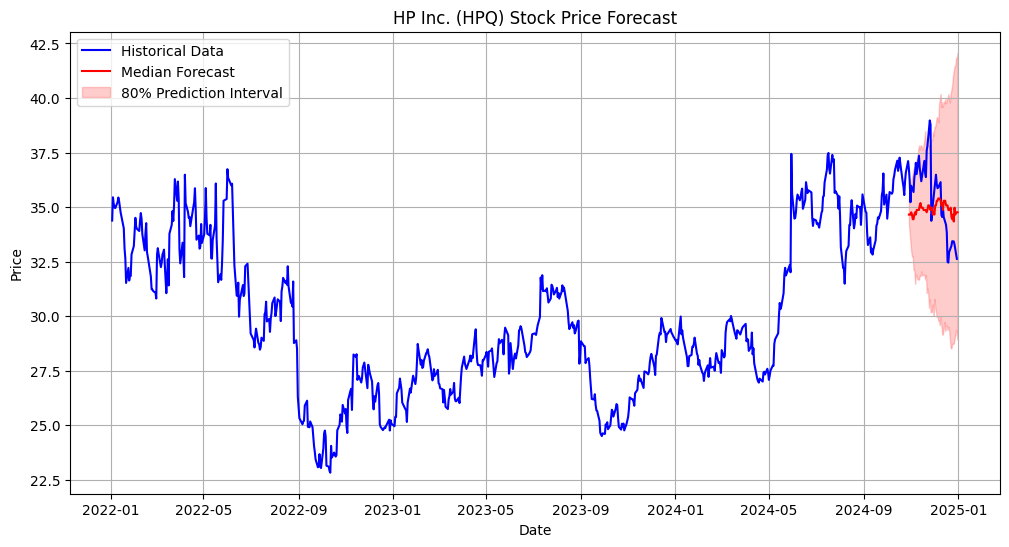

MASE: 2.6090, WQL: 0.6179

Processing IBM (IBM):


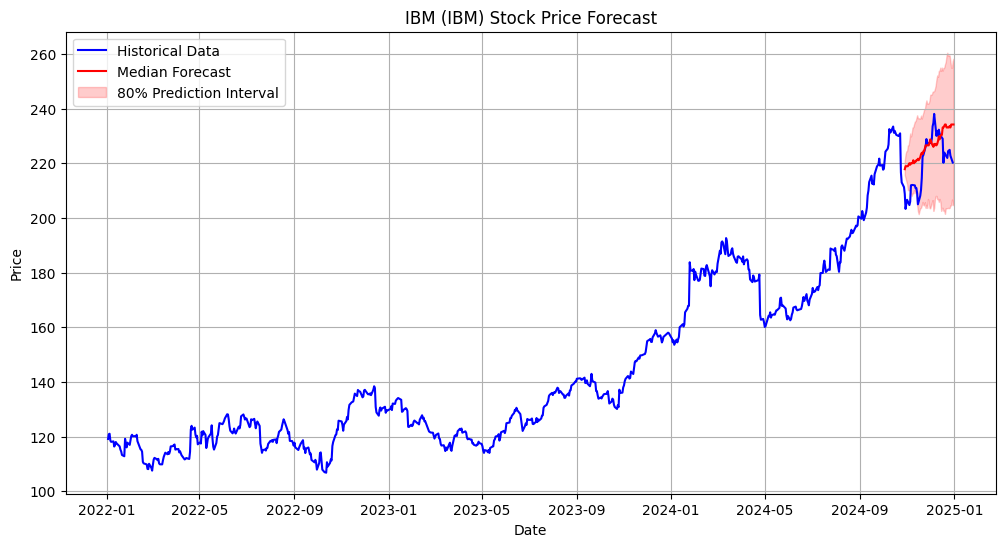

MASE: 3.2720, WQL: 3.0522

Processing Intel (INTC):


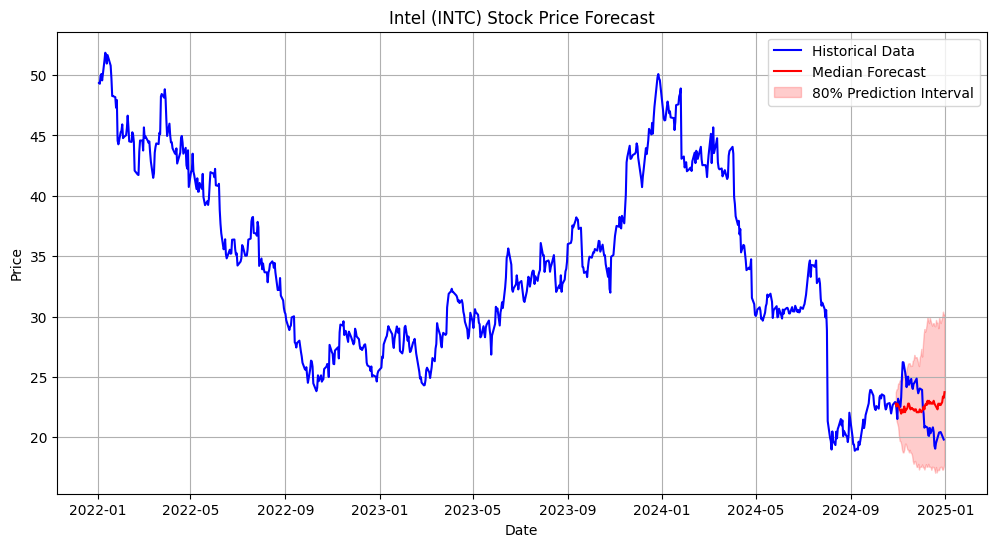

MASE: 3.5975, WQL: 0.7038

Processing Intuit (INTU):


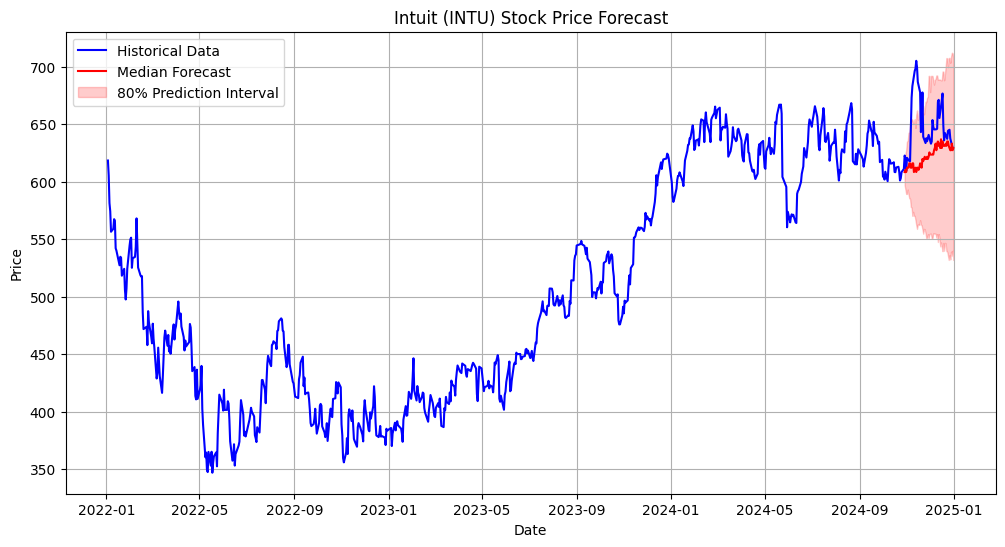

MASE: 2.8239, WQL: 13.8713

Processing Jabil (JBL):


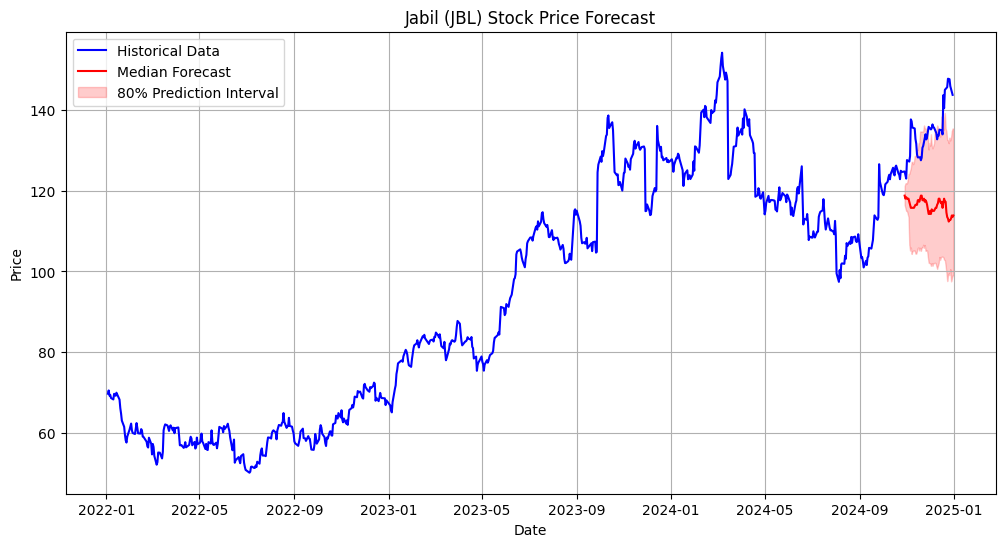

MASE: 10.5721, WQL: 6.9007

Processing Juniper Networks (JNPR):


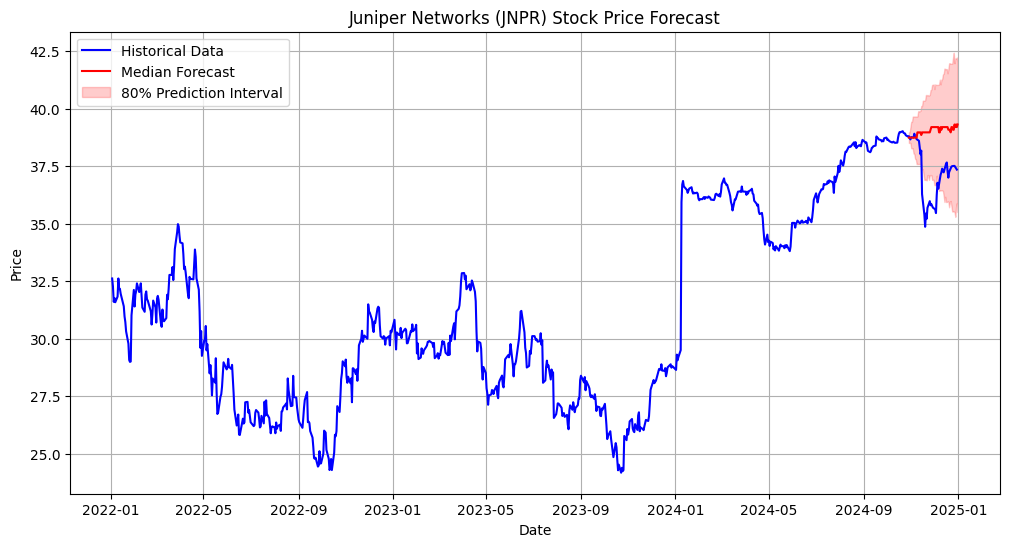

MASE: 6.8628, WQL: 0.6874

Processing Keysight Technologies (KEYS):


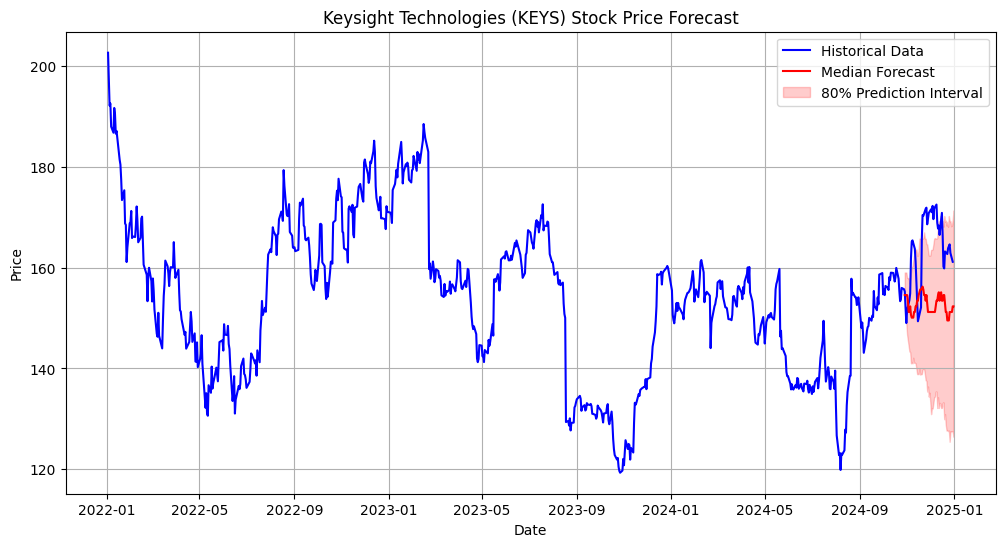

MASE: 4.5022, WQL: 4.4993

Processing KLA Corporation (KLAC):


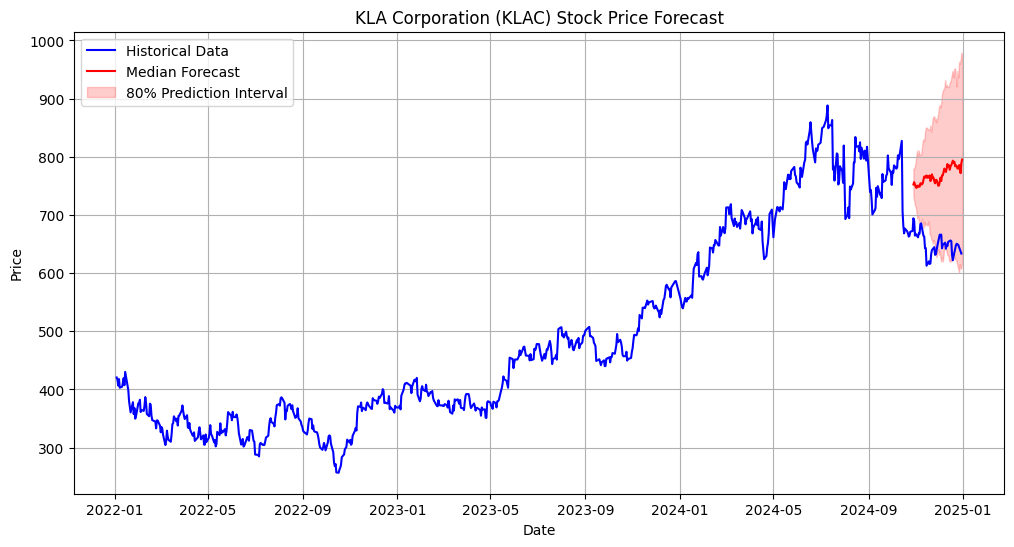

MASE: 13.4218, WQL: 41.6311

Processing Lam Research (LRCX):


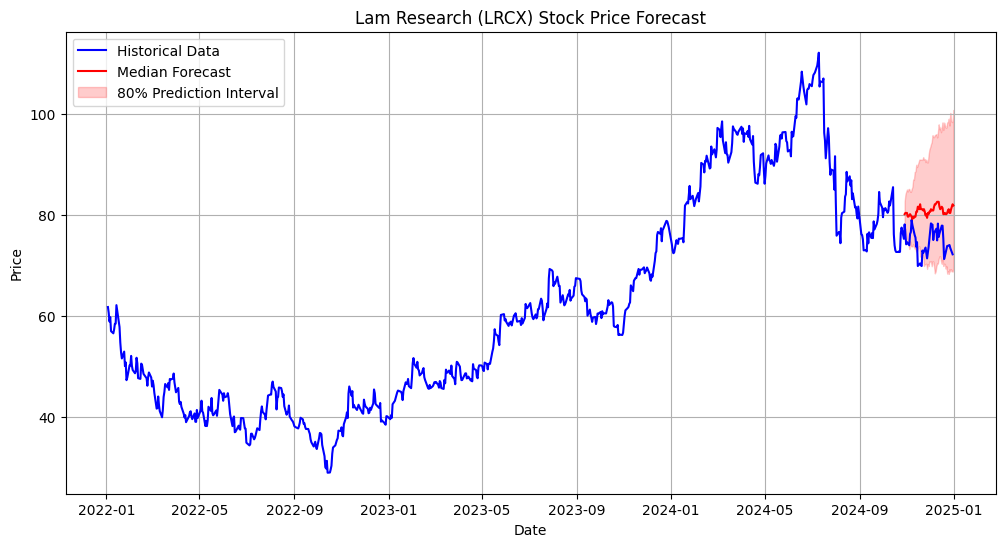

MASE: 4.0219, WQL: 2.1917

Processing Microchip Technology (MCHP):


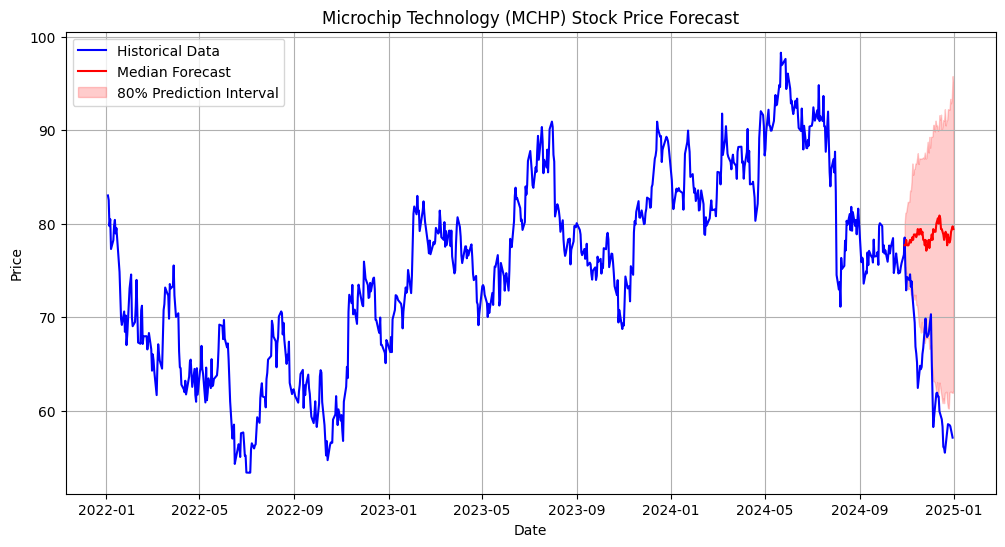

MASE: 9.5245, WQL: 5.2761

Processing Micron Technology (MU):


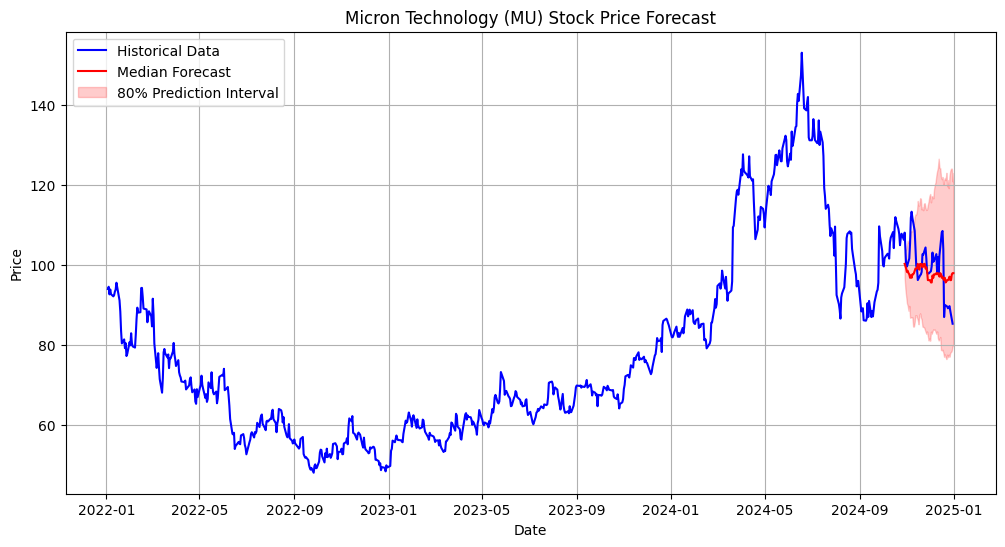

MASE: 1.9737, WQL: 2.3288

Processing Microsoft (MSFT):


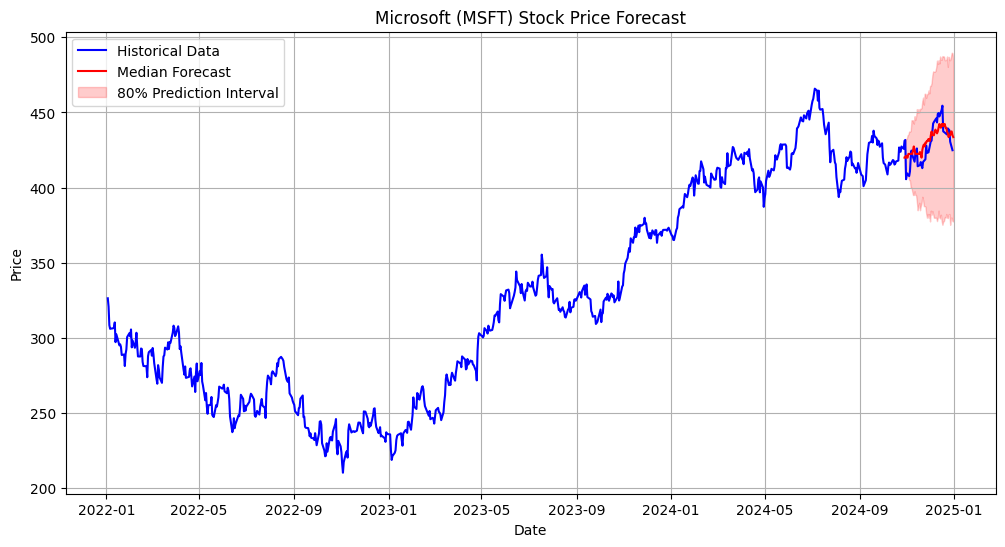

MASE: 1.6271, WQL: 4.1799

Processing Monolithic Power Systems (MPWR):


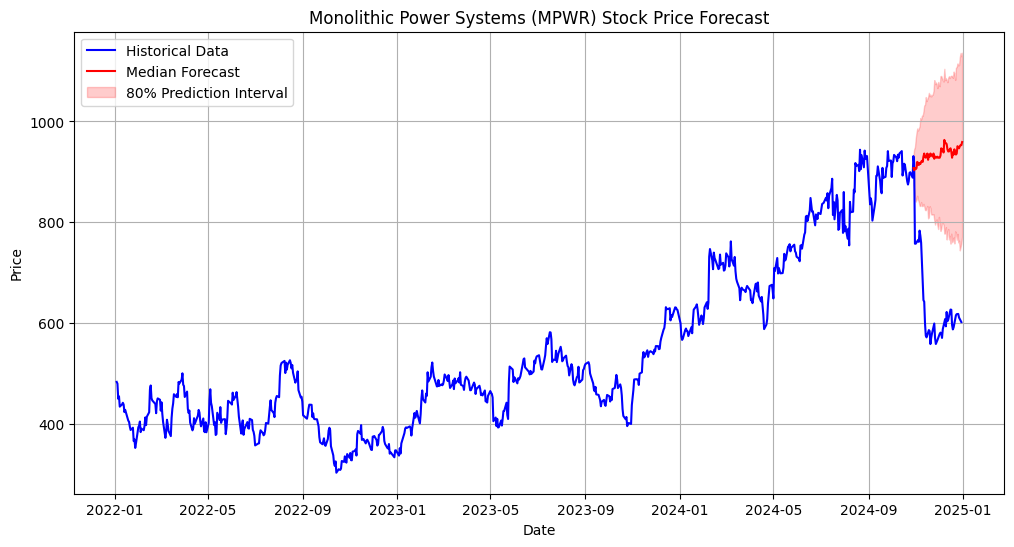

MASE: 15.8881, WQL: 129.1094

Processing Motorola Solutions (MSI):


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from chronos import ChronosPipeline
import matplotlib.pyplot as plt
import torch

def get_stock_data(ticker, start_date, end_date):
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date)
    if df.empty:
        print(f"Warning: No data found for {ticker}. It may be delisted or unavailable.")
        return None
    df.index = df.index.tz_localize(None)  # Ensure timezone consistency
    return df['Close']

def calculate_mase(actual, predicted):
    if actual is None or predicted is None:
        return np.nan
    mae = np.mean(np.abs(actual - predicted))
    naive_mae = np.mean(np.abs(actual.values[1:] - actual.values[:-1]))
    return mae / naive_mae

def calculate_wql(actual, forecast_array):
    if actual is None or forecast_array is None:
        return np.nan
    quantiles = np.linspace(0.1, 0.9, 9)
    wql_scores = []
    forecast_array_trimmed = forecast_array[:, :len(actual)]
    for q in quantiles:
        quantile_forecast = np.percentile(forecast_array_trimmed, q * 100, axis=0)
        error = np.maximum(q * (actual - quantile_forecast), (q - 1) * (actual - quantile_forecast))
        wql_scores.append(np.mean(error))
    return np.mean(wql_scores)

def process_company(company_name, ticker):
    print(f"\nProcessing {company_name} ({ticker}):")
    start_date, end_date, forecast_start, forecast_end = "2022-01-01", "2024-10-02", "2024-10-29", "2024-12-31"

    all_stock = get_stock_data(ticker, start_date, forecast_end)
    stock = get_stock_data(ticker, start_date, end_date)

    if stock is None or all_stock is None:
        return {'Company': company_name, 'Ticker': ticker, 'MASE': np.nan, 'WQL': np.nan}

    stock_pipeline = ChronosPipeline.from_pretrained('amazon/chronos-t5-small', device_map="cpu", torch_dtype=torch.bfloat16)
    context = torch.tensor(stock.values).unsqueeze(0)
    stock_forecast = stock_pipeline.predict(context=context, prediction_length=64, num_samples=100)

    forecast_dates = pd.date_range(start=forecast_start, end=forecast_end)
    forecast_array = stock_forecast.numpy().squeeze()

    median_forecast = np.median(forecast_array, axis=0)
    lower_bound, upper_bound = np.percentile(forecast_array, 10, axis=0), np.percentile(forecast_array, 90, axis=0)

    stock_forecast_df = pd.DataFrame({'Median Forecast': median_forecast, 'Lower Bound': lower_bound, 'Upper Bound': upper_bound}, index=forecast_dates)

    plt.figure(figsize=(12, 6))
    plt.plot(all_stock.index, all_stock.values, label='Historical Data', color='blue')
    plt.plot(stock_forecast_df.index, stock_forecast_df['Median Forecast'], label='Median Forecast', color='red')
    plt.fill_between(stock_forecast_df.index, stock_forecast_df['Lower Bound'], stock_forecast_df['Upper Bound'], color='red', alpha=0.2, label='80% Prediction Interval')
    plt.title(f'{company_name} ({ticker}) Stock Price Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    actual_forecast = all_stock[forecast_start:forecast_end]
    mase, wql = calculate_mase(actual_forecast, stock_forecast_df['Median Forecast']), calculate_wql(actual_forecast.values, forecast_array)

    print(f"MASE: {mase:.4f}, WQL: {wql:.4f}")
    return {'Company': company_name, 'Ticker': ticker, 'MASE': mase, 'WQL': wql}

summary_results = pd.DataFrame([process_company(row["Security"], row["Symbol"]) for _, row in it_companies.iterrows()])
summary_results


### + Tech Indicators

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from ta.momentum import RSIIndicator
from ta.trend import MACD
from ta.volatility import BollingerBands

def add_technical_indicators(df):
    """Compute and add technical indicators to the stock data."""

    df["SMA_20"] = df["Close"].rolling(window=20).mean()  # 20-day SMA
    df["EMA_20"] = df["Close"].ewm(span=20, adjust=False).mean()  # 20-day EMA

    # Relative Strength Index (RSI)
    df["RSI_14"] = RSIIndicator(df["Close"], window=14).rsi()

    # MACD
    macd = MACD(df["Close"], window_slow=26, window_fast=12, window_sign=9)
    df["MACD"] = macd.macd()
    df["MACD_Signal"] = macd.macd_signal()

    # Bollinger Bands
    bb = BollingerBands(df["Close"], window=20, window_dev=2)
    df["BB_Upper"] = bb.bollinger_hband()
    df["BB_Lower"] = bb.bollinger_lband()

    return df

# Example: Fetch Apple's stock data and add indicators
ticker = "AAPL"
stock_data = yf.download(ticker, start="2022-01-01", end="2024-12-31")
stock_data = add_technical_indicators(stock_data)
stock_data.dropna(inplace=True)  # Remove NaNs from indicator calculations
print(stock_data.head())

In [ ]:
import torch
from sklearn.preprocessing import MinMaxScaler

# Select features (Close price + Technical Indicators)
features = ["Close", "SMA_20", "EMA_20", "RSI_14", "MACD", "MACD_Signal", "BB_Upper", "BB_Lower"]

# Normalize features for stable model performance
scaler = MinMaxScaler()
stock_scaled = scaler.fit_transform(stock_data[features])

# Convert to PyTorch tensor (Chronos expects 2D: [seq_len, features])
context = torch.tensor(stock_scaled, dtype=torch.float32)

# Ensure context is 2D: (sequence_length, feature_dim)
if context.ndim == 1:
    context = context.unsqueeze(1)

In [ ]:
from chronos import ChronosPipeline

# Load Chronos-Bolt model
chronos_model = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-small",
    device_map="cpu",
    torch_dtype=torch.bfloat16
)

# Forecast the next 30 days
prediction_length = 30
num_samples = 50

stock_forecast = chronos_model.predict(
    context=context,
    prediction_length=prediction_length,
    num_samples=num_samples
)

In [ ]:
from sklearn.metrics import mean_absolute_error

def calculate_mase(actual, forecast):
    """Compute MASE: Mean Absolute Scaled Error."""
    naive_forecast = actual.shift(1).dropna()
    naive_mae = mean_absolute_error(actual.iloc[1:], naive_forecast)
    model_mae = mean_absolute_error(actual, forecast)
    return model_mae / naive_mae if naive_mae != 0 else np.nan

# Align lengths before evaluation
actual_forecast = stock_data["Close"][-prediction_length:]
min_length = min(len(actual_forecast), len(stock_forecast.numpy().squeeze()))

actual_trimmed = actual_forecast.iloc[:min_length]
forecast_trimmed = stock_forecast.numpy().squeeze()[:min_length]

# Compute MASE
mase = calculate_mase(actual_trimmed, forecast_trimmed)

print(f"Mean Absolute Scaled Error (MASE) with Indicators: {mase:.4f}")